# Traffic Accident Severity Prediction using Random Forest
This notebook trains a Random Forest Classifier on the US Accidents dataset to predict accident severity.

In [13]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [14]:
# Load dataset
df = pd.read_csv('../dataset/US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [15]:
# Select relevant features and target
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset']
target = 'Severity'

# Drop rows with missing values in selected columns
df = df[features + [target]].dropna()

# Initialize dict to save LabelEncoders
label_encoders = {}


In [16]:
# Encode categorical features
categorical_features = ['Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    joblib.dump(le, f'../app/model/{col}_label_encoder.pkl')

In [17]:
# Identify categorical and numerical features
categorical_features = ['Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset']
numerical_features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

In [18]:
# Split the data
X = df[categorical_features + numerical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50000, stratify=y, random_state=42)

In [19]:
# Scale numerical features
scaler = StandardScaler()
X_train[categorical_features + numerical_features] = scaler.fit_transform(X_train[categorical_features + numerical_features])
X_test[categorical_features + numerical_features] = scaler.transform(X_test[categorical_features + numerical_features])
joblib.dump(scaler, '../app/model/scaler.pkl')

['../app/model/scaler.pkl']

In [20]:
# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [21]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

[[      8   64704       4       0]
 [     15 5633207    6944       0]
 [      0 1122889    6337       0]
 [      2  176899     829       1]]
              precision    recall  f1-score   support

           1       0.32      0.00      0.00     64716
           2       0.81      1.00      0.89   5640166
           3       0.45      0.01      0.01   1129226
           4       1.00      0.00      0.00    177731

    accuracy                           0.80   7011839
   macro avg       0.64      0.25      0.23   7011839
weighted avg       0.75      0.80      0.72   7011839

Accuracy: 0.80


In [22]:
joblib.dump(rf_model, '../app/model/accident_severity_model.pkl', compress=3)

['../app/model/accident_severity_model.pkl']

# 🔍 Data Visualization

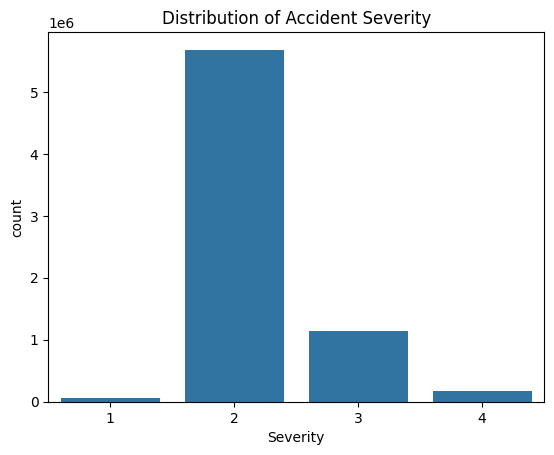

In [23]:
# Visualize the distribution of accident severity
sns.countplot(x='Severity', data=df)
plt.title("Distribution of Accident Severity")
plt.show()


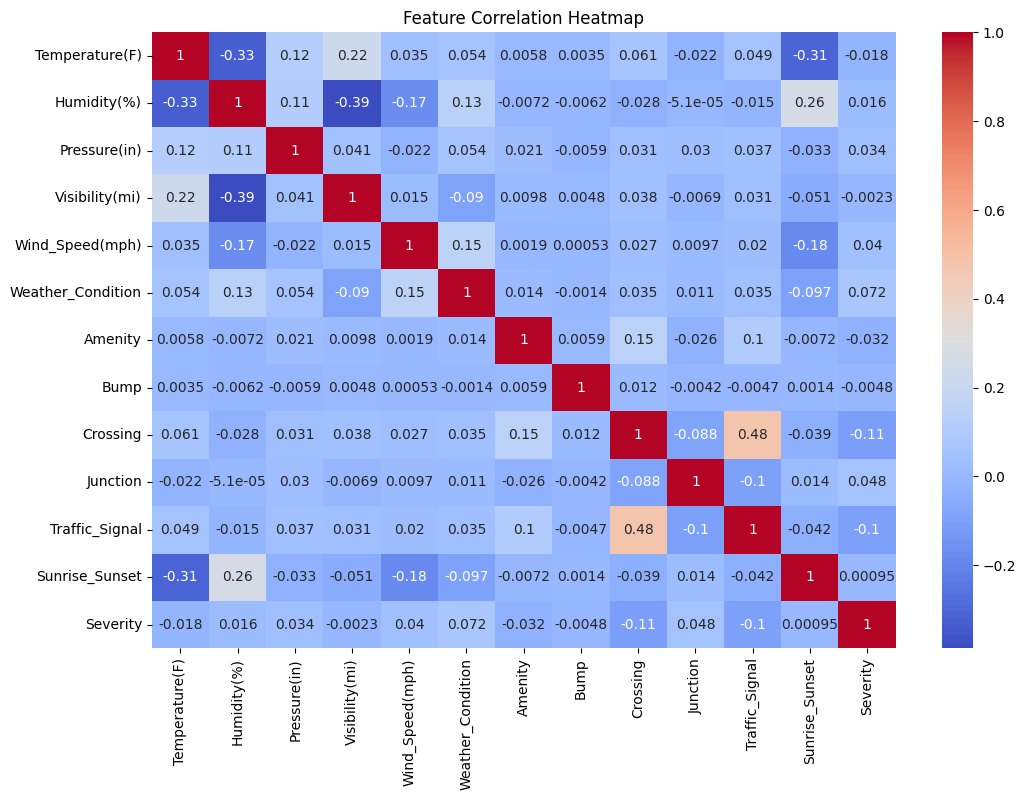

In [24]:
# Check correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
